Import libraries


In [1]:
 import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data

In [2]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

Diffrent Attributes

In [4]:
print(df.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


Checking NUll values

In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Information about Attributes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Data insight and Labels

In [8]:
df['label'].value_counts() #total 3168

male      1584
female    1584
Name: label, dtype: int64

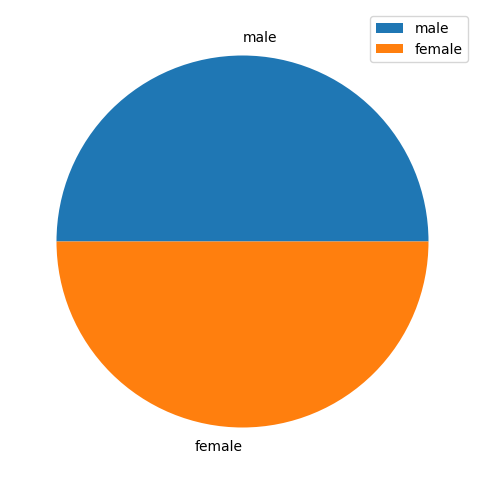

In [9]:
val= [1584,1584]
label = ['male','female']
plt.figure(figsize=(6,8))
plt.pie(val,labels=label)
plt.legend()
plt.show()

In [10]:
df.label= [1 if each=='female' else 0 for each in df.label]
df.label

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label, Length: 3168, dtype: int64

Splitting dataset Into Training and Testing Set

In [11]:
from sklearn.model_selection import train_test_split

y=df.label.values
x=df.drop(['label'],axis='columns')

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state =50)

algo_names=[]
algo_scores=[]

In [12]:
x_train.shape

(2534, 20)

In [13]:
x_test.shape

(634, 20)

In [14]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
974,0.188291,0.060757,0.196792,0.128553,0.243459,0.114906,1.924342,6.921315,0.898536,0.359334,0.117107,0.188291,0.130205,0.048096,0.274286,1.341518,0.023438,5.414062,5.390625,0.112298
2769,0.187396,0.044700,0.185598,0.171349,0.206260,0.034911,2.454544,9.671798,0.878222,0.354332,0.174198,0.187396,0.155880,0.048534,0.277457,1.388672,0.023438,6.609375,6.585938,0.109103
1805,0.177266,0.033878,0.175619,0.166018,0.188938,0.022920,3.261121,14.297520,0.816742,0.226999,0.164469,0.177266,0.164342,0.020833,0.250000,0.596128,0.078125,6.203125,6.125000,0.146104
175,0.134962,0.062047,0.111388,0.088780,0.189571,0.100791,2.317095,9.072179,0.931091,0.560896,0.104794,0.134962,0.086565,0.016277,0.275862,0.329346,0.007812,4.265625,4.257812,0.132783
1919,0.097562,0.070847,0.071001,0.038766,0.158224,0.119458,1.430850,4.652448,0.952220,0.664712,0.038555,0.097562,0.148914,0.019851,0.222222,0.255774,0.007812,0.640625,0.632812,0.305836


# Applying Diffrent Models

Random Forest

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rand_forest = DecisionTreeClassifier(random_state=50) #build
rand_forest.fit(x_train , y_train) #train

print('Random Forest Classifier Score :  ',rand_forest.score(x_test,y_test)) #test/ make predictions

algo_names.append("Random Forest")
algo_scores.append(rand_forest.score(x_test,y_test))
p1=rand_forest.predict(x_test) 

Random Forest Classifier Score :   0.9511041009463722


SVM

In [17]:
from sklearn.svm import SVC
svm = SVC(random_state=50)
svm.fit(x_train , y_train)

print('SVM Classifier Score :  ',format(svm.score(x_test,y_test))) 

algo_names.append("SVM")
algo_scores.append(svm.score(x_test,y_test))
p2=svm.predict(x_test) 

SVM Classifier Score :   0.6750788643533123


Naive Bayes 

In [18]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train , y_train)

print('Naive Bayes Classifier Score :  ',format(naive_bayes.score(x_test,y_test))) 

algo_names.append("Naive Bayes")
algo_scores.append(naive_bayes.score(x_test,y_test))
p3=naive_bayes.predict(x_test) 

Naive Bayes Classifier Score :   0.8943217665615142


K-Nearest Neighbour

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train , y_train)

print('KNN Classifier Score :  ',
      format(knn.score(x_test,y_test))) 

algo_names.append("KNN")
algo_scores.append(knn.score(x_test,y_test))
p4=knn.predict(x_test) 

KNN Classifier Score :   0.7208201892744479


# Comparing classification Score

Text(0, 0.5, 'Algorithm score')

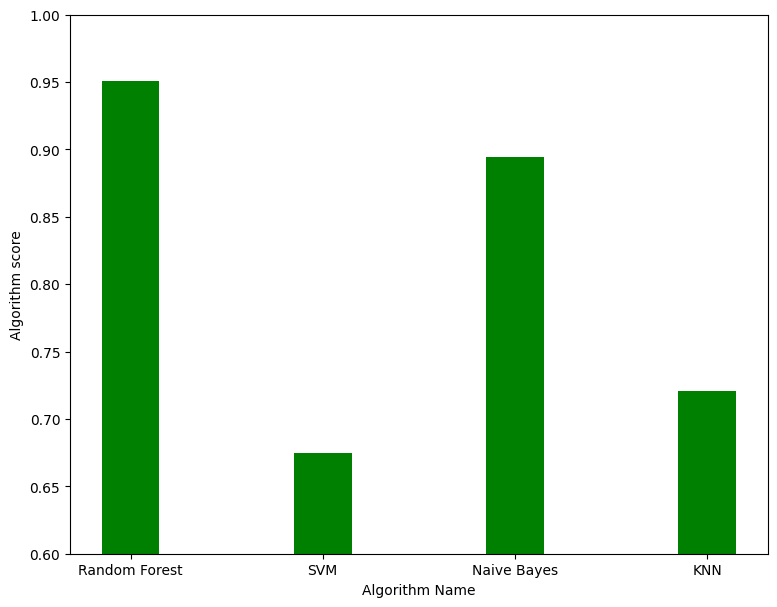

In [20]:
plt.figure(figsize=(9,7))
plt.ylim([0.60,1])
plt.bar(algo_names,algo_scores,width=0.3,color=['green'])
plt.xlabel('Algorithm Name')
plt.ylabel('Algorithm score')


# Printing classification report using sklearn.metrics library and Classification Report function

In [21]:
from sklearn.metrics import classification_report

Random forest Classification Report

In [22]:
report_ran_forest=classification_report(y_test,p1)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       310
           1       0.95      0.95      0.95       324

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



Svm Classification Report

In [23]:
report_svm=classification_report(y_test,p2)
print(report_svm)

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       310
           1       0.77      0.52      0.62       324

    accuracy                           0.68       634
   macro avg       0.70      0.68      0.67       634
weighted avg       0.70      0.68      0.67       634



Naive bayes

In [24]:
report_nav_bayes=classification_report(y_test,p3)
print(report_nav_bayes)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       310
           1       0.90      0.89      0.90       324

    accuracy                           0.89       634
   macro avg       0.89      0.89      0.89       634
weighted avg       0.89      0.89      0.89       634



KNN classification Report 

In [25]:
report_knn=classification_report(y_test,p4)
print(report_knn)

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       310
           1       0.74      0.69      0.72       324

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634



# Pie chart for (Wrong vs Correct)

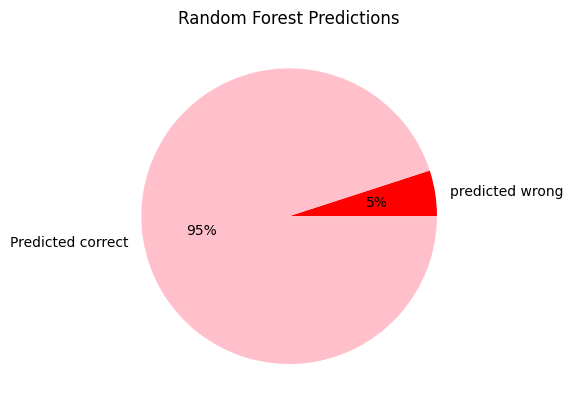

In [27]:
comp1=[31.7,602.3]
l1=['predicted wrong','Predicted correct']
plt.pie(comp1,labels=l1,autopct='%0.lf%%',colors=['red','pink'])
plt.title('Random Forest Predictions')
plt.show()

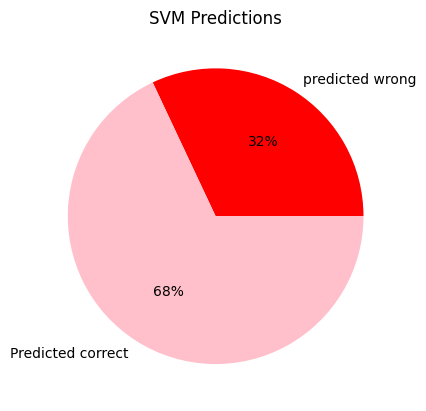

In [28]:
comp2=[202.88,431.12]
l1=['predicted wrong','Predicted correct']
plt.pie(comp2,labels=l1,autopct='%0.lf%%',colors=['red','pink'])
plt.title('SVM Predictions')
plt.show()

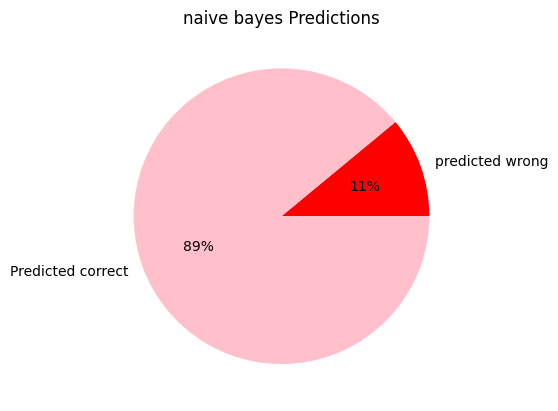

In [30]:
comp3=[69.74,564.26]
l1=['predicted wrong','Predicted correct']
plt.pie(comp3,labels=l1,autopct='%0.lf%%',colors=['red','pink'])
plt.title('naive bayes Predictions')
plt.show()

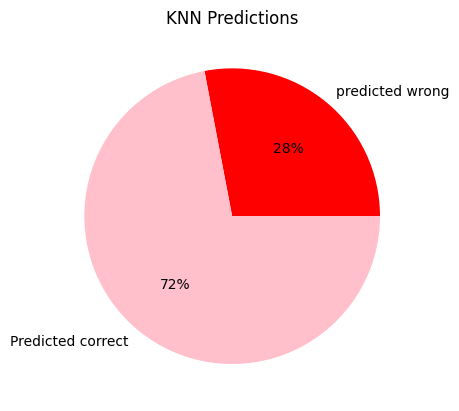

In [31]:
comp4=[177.52,456.48]
l1=['predicted wrong','Predicted correct']
plt.pie(comp4,labels=l1,autopct='%0.lf%%',colors=['red','pink'])
plt.title('KNN Predictions')
plt.show()

# Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix

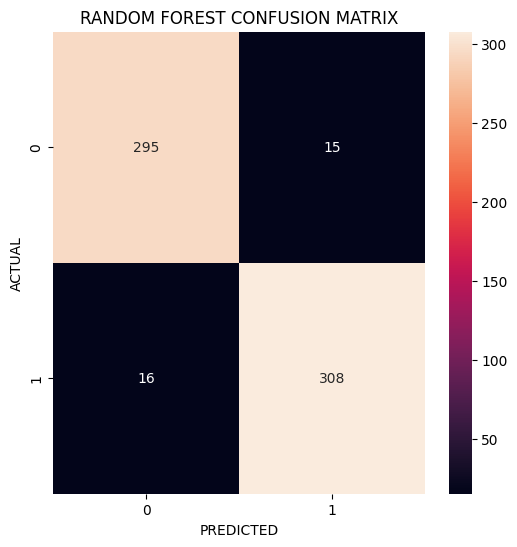

In [33]:
conf_mat1= confusion_matrix(y_test,p1)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f") #HeatMap used for plotting
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("RANDOM FOREST CONFUSION MATRIX")
plt.show()


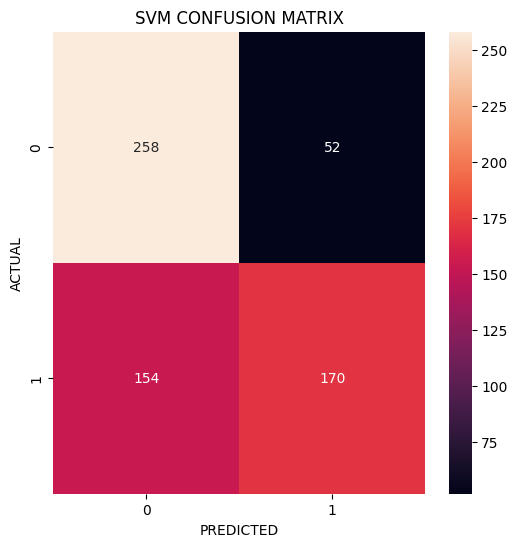

In [34]:
conf_mat1= confusion_matrix(y_test,p2)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f") #HeatMap used for plotting
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("SVM CONFUSION MATRIX")
plt.show()


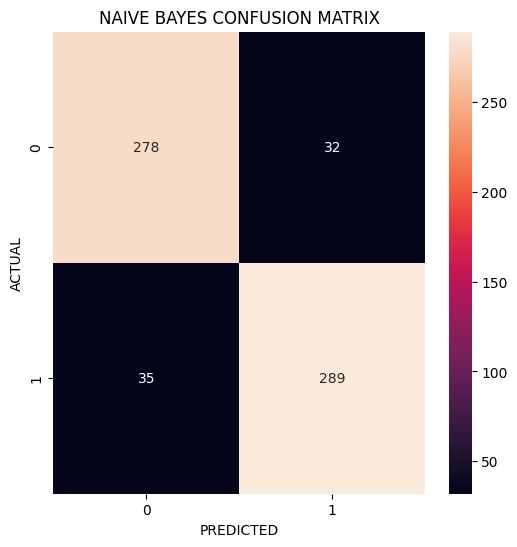

In [35]:
conf_mat1= confusion_matrix(y_test,p3)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f") #HeatMap used for plotting
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("NAIVE BAYES CONFUSION MATRIX")
plt.show()


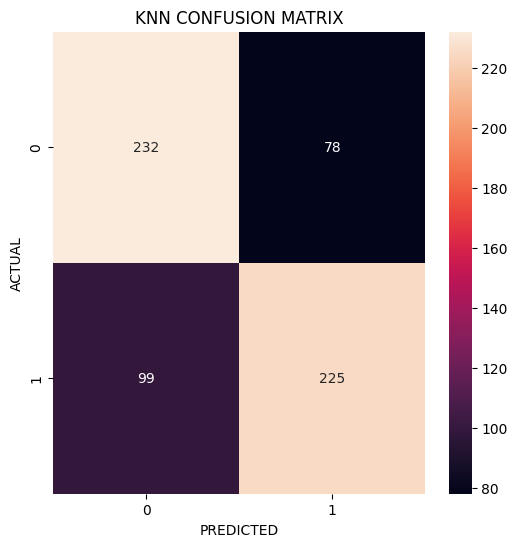

In [36]:
conf_mat1= confusion_matrix(y_test,p4)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f") #HeatMap used for plotting
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("KNN CONFUSION MATRIX")
plt.show()


# CONCLUSION

 BASED ON PRECISION,F-SCORE,RECALL VALUES,PIE CHART,ACCURACY SCORE AND CONFUSION MATRIX WE CAN SAY THAT AMONG ALL THE ABOVE ALGORITHMS RANDOM FOREST CLASSIFICATION IS BEST SUITED FOR THIS PROBLEM.
SUPPORT VECTOR MACHINE IS LEAST SUITABLE BASED ON SAME ANALYSIS.